In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import pandas as pd
sns.set()

In [2]:
df = pd.read_csv('wine.csv')
df.shape

(178, 14)

In [3]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
X = df.iloc[:, 1:]

In [5]:
y = df['Wine']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
sc= StandardScaler()

In [10]:
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [11]:
pca = PCA(n_components=2)
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
print(np.round(pca.explained_variance_ratio_,3))

[0.363 0.189]


In [13]:
pd.DataFrame(np.round(pca.components_,3),columns=X.columns)

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,0.145,-0.230,-0.011,-0.240,0.133,0.392,0.419,-0.286,0.319,-0.099,0.310,0.375,0.302
1,-0.495,-0.218,-0.281,0.041,-0.295,-0.092,0.013,-0.014,-0.057,-0.537,0.295,0.189,-0.341


In [14]:
pca = PCA(n_components=None)

In [15]:
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
pca.fit_transform(X_train_scaled)

array([[-2.73136661, -1.40298686, -0.51425753, ...,  0.00497987,
        -0.14262214, -0.24236203],
       [-0.23305952,  1.9869553 , -0.0795461 , ...,  0.0881977 ,
        -0.53431162, -0.02963231],
       [-0.50731068,  2.61945859,  2.10392381, ...,  0.37279076,
         0.76255279, -0.26979473],
       ...,
       [ 2.56032569, -0.03106541,  0.94276717, ..., -0.29231695,
        -0.38748495, -0.08698339],
       [-0.42960186,  2.39456298,  0.93237995, ...,  0.18278507,
        -0.39082619, -0.4150959 ],
       [-1.69613305,  1.30004657,  0.55649281, ...,  0.15182441,
        -0.38953025, -0.02205377]])

In [17]:
print(np.round(pca.explained_variance_ratio_,3))

[0.363 0.189 0.115 0.075 0.068 0.05  0.04  0.026 0.02  0.019 0.016 0.013
 0.008]


In [18]:
0.398+0.186+0.106+0.08++0.062+0.042+0.039+0.027+0.018+0.015+0.012+0.008+0.006

0.9990000000000002

In [19]:
cumsum= np.cumsum(pca.explained_variance_ratio_)

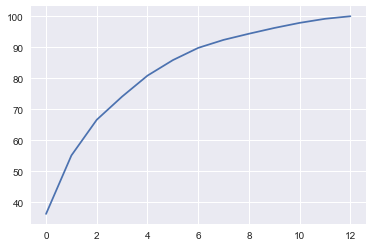

In [20]:
plt.plot(cumsum*100)

In [31]:
res = pca.transform(X_train_scaled)
pd.DataFrame(res)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-2.731367,-1.402987,-0.514258,0.555682,-0.210012,0.430931,-0.322864,0.188234,-0.006560,0.219119,0.004980,-0.142622,-0.242362
1,-0.233060,1.986955,-0.079546,0.871873,0.760412,-0.297744,-0.820701,0.741409,0.521606,0.068792,0.088198,-0.534312,-0.029632
2,-0.507311,2.619459,2.103924,-0.640641,-0.536287,-0.287648,-0.614678,-0.841583,-0.258611,0.162569,0.372791,0.762553,-0.269795
3,-2.534283,-0.422294,-0.919752,0.121080,0.757847,-0.359052,0.588321,-0.473773,-0.132883,0.978020,-0.410604,-0.801298,0.069049
4,1.140170,-0.058171,0.900577,1.147222,0.798273,-1.037312,0.201754,-0.179714,-0.597026,-0.574798,-0.226861,0.602371,-0.309868
5,3.536579,-1.138538,-0.478815,0.154443,-0.071401,-0.253110,-0.051467,-1.089834,-0.236758,0.556977,0.587966,-0.159026,0.115003
6,-1.329973,-0.059339,-0.960344,-2.000255,2.024002,0.336631,-0.414528,0.340563,-0.098466,-0.603490,-0.377335,-1.012311,0.218428
7,-2.797500,-1.794629,-0.867511,1.355463,-0.365829,0.142771,0.310038,-0.008711,0.357600,-0.513564,-0.035902,0.064827,-0.148851
8,2.714861,-1.265875,-0.314040,-0.363408,0.020539,0.209386,-0.688472,-0.494300,-0.717257,0.766068,0.577689,-0.133535,0.201766
9,2.566105,0.023807,3.438842,-1.048446,1.667210,0.256683,-0.400071,-0.582968,1.172255,1.562807,0.860083,0.051992,-0.133520


In [33]:
index_name = ['PCA_'+str(k) for k in range(0, len(res))]

In [39]:
df1 = pd.DataFrame(res,columns=df.columns[1:],index=index_name)[0:4]
df1.T.sort_values(by="PCA_0")

,PCA_0,PCA_1,PCA_2,PCA_3
Alcohol,-2.731367,-0.233060,-0.507311,-2.534283
Malic.acid,-1.402987,1.986955,2.619459,-0.422294
Ash,-0.514258,-0.079546,2.103924,-0.919752
Flavanoids,-0.322864,-0.820701,-0.614678,0.588321
Proline,-0.242362,-0.029632,-0.269795,0.069049
Mg,-0.210012,0.760412,-0.536287,0.757847
OD,-0.142622,-0.534312,0.762553,-0.801298
Proanth,-0.006560,0.521606,-0.258611,-0.132883
Hue,0.004980,0.088198,0.372791,-0.410604
Nonflavanoid.phenols,0.188234,0.741409,-0.841583,-0.473773
